# HW5
Callum Anderson

In [2]:
import sys
sys.path.append("C:\\Users\\callu\\.mlrefined")
datapath = "C:\\Users\\callu\\.mlrefined\\mlrefined_datasets\\superlearn_datasets\\"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

import numpy as np
import pandas as pd


import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

print('IMPORTED')

IMPORTED


# Exercise 1

In [2]:
def generate_stripe_image(size, stripe_nr, vertical = True):
  img=np.zeros((size,size,1),dtype="uint8")
  for i in range(0,stripe_nr):
    x,y = np.random.randint(0,size,2)
    l  = int(np.random.randint(y,size,1))
    if (vertical):
      img[y:l,x,0]=255
    else:
      img[x,y:l,0]=255
  return img  

(50, 50, 1)


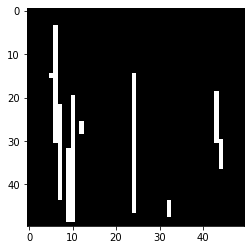

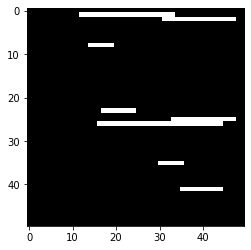

In [3]:
img = generate_stripe_image(50,10, vertical=1)
img2 = generate_stripe_image(50,10, vertical=0)
print(np.shape(img))
plt.imshow(img[:,:,0],cmap='gray')
plt.show()
plt.imshow(img2[:,:,0],cmap='gray')
plt.show()

## 1.1) 
As in the example above, let us decide to work with 50×50 images each with 10 random
stripes. Use the above function to generate 1,000 training images and 1,000 validation images
X train, X val, each with exactly 500 images with horizonal stripes and 500 images with
vertical stripes. Normalize the two sets.


In [4]:
Xtrain = []

num_false = 0
num_true = 0
Ytrain = []

for i in range(1000):
    
    #creating number randomly assigned a 1 or 0 to make the
    #images randomly horizontal or vertical stripes but it will also stop
    #when we get either 500 vertical or horizontal stripes
    #vertical == 1, horizontal == 0
    if (num_true <500 and num_false <500):
        t_or_f = random.randint(0,1)
    elif(num_true == 500):
        t_or_f = 0
    else:
        t_or_f = 1
        
    if t_or_f == 1:
        num_true = num_true + 1
    else:
        num_false = num_false + 1
    
    #appending the horizontal/vertical label to a list
    Ytrain.append(t_or_f)
    #creating 500 vertical & 500 horizontal striped images
    img = generate_stripe_image(50,10, vertical = t_or_f)
    #appending the images to a list
    Xtrain.append(img)
    
Xtrain = np.array([Xtrain])
print(np.shape(Xtrain))
Xtrain = Xtrain/255.
Xtrain.shape = (1000,50,50,1)
print(np.shape(Xtrain))
print(Ytrain)

(1, 1000, 50, 50, 1)
(1000, 50, 50, 1)
[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 

In [5]:
Xval = []

num_false = 0
num_true = 0
Yval = []

for i in range(1000):
    
    #creating number randomly assigned a 1 or 0 to make the
    #images randomly horizontal or vertical stripes but it will also stop
    #when we get either 500 vertical or horizontal stripes
    #vertical == 1, horizontal == 0
    if (num_true <500 and num_false <500):
        t_or_f = random.randint(0,1)
    elif(num_true == 500):
        t_or_f = 0
    else:
        t_or_f = 1
        
    if t_or_f == 1:
        num_true = num_true + 1
    else:
        num_false = num_false + 1
    
    #appending the horizontal/vertical label to a list
    Yval.append(t_or_f)
    #creating 500 vertical & 500 horizontal striped images
    img = generate_stripe_image(50,10, vertical = t_or_f)
    #appending the images to a list    
    Xval.append(img)
    
Xval = np.array([Xval])
print(np.shape(Xval))
Xval = Xval/255.
Xval.shape = (1000,50,50,1)
print(np.shape(Xval))
print(Yval)

(1, 1000, 50, 50, 1)
(1000, 50, 50, 1)
[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 

## 1.2)
Create labels Y train, Y val with the correct labels for the training and validation images.
For instance, use 0 for images with vertical stripes and 1 for images with horizontal stripes.
1
In the following we shall use one-hot encoding, so convert Y train, Y val to one-hot format
using the Tensorflow/Keras function to categorical.


In [6]:
from tensorflow.keras.utils import to_categorical
# Note that this is done in when creating them as the are randomly assigned
#print('First 10 training labels:\t', Ytrain[0:10])
#print('First 10 validation labels:\t', Yval[0:10])

#creating arrays out of the lists
Ytrain = np.array([Ytrain])
#print(Ytrain[0])
Ytrain = to_categorical(Ytrain,2)
Ytrain.shape = (1000,1,1,2)
#print(Ytrain[0][0][0])

Yval = np.array([Yval])
Yval = to_categorical(Yval,2)
Yval.shape = (1000,1,1,2)

print(np.shape(Ytrain))
print(np.shape(Yval))

(1000, 1, 1, 2)
(1000, 1, 1, 2)


## 1.3)
Use Tensorflow/Keras to build a convolution network with a few layers: a 5x5 kernel convolution layer with linear activation and a single filter, a max pooling 2D layer with pool size=50,
and a dense layer with 2 neurons activated with softmax. Compile it using:

model.compile(loss=’categorical_crossentropy’,
optimizer=’adam’,
metrics=[’accuracy’])

How many parameters do you have ?


In [7]:

model = models.Sequential([
    layers.Conv2D(1, 5,padding = 'same', activation='linear', input_shape=(50, 50, 1)),
    layers.MaxPooling2D(pool_size = 50),
    layers.Dense(2,activation='softmax')
    ])

stochastic_GD = tf.keras.optimizers.SGD(learning_rate = 0.15)

model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 1)         26        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 1)           0         
_________________________________________________________________
dense (Dense)                (None, 1, 1, 2)           4         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


## 1.4)
We can now use the one-hot encoded data to train the model. Let’s do that using code given:

Plot the model and validation accuracy as a function of the epoch. Make another plot of the
model and validation loss versus the epoch. These are accessible as for instance
history.history[’val loss’] etc.

In [39]:
history=model.fit(Xtrain, Ytrain,
                  validation_data=(Xval,Yval),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True) 


Epoch 1/50
16/16 [==============================] - 1s 59ms/step - loss: 0.9270 - accuracy: 0.5000 - val_loss: 0.8842 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 1s 44ms/step - loss: 0.8438 - accuracy: 0.5000 - val_loss: 0.8097 - val_accuracy: 0.5000
Epoch 3/50
16/16 [==============================] - 1s 44ms/step - loss: 0.7763 - accuracy: 0.5000 - val_loss: 0.7505 - val_accuracy: 0.5000
Epoch 4/50
16/16 [==============================] - 1s 46ms/step - loss: 0.7260 - accuracy: 0.5000 - val_loss: 0.7069 - val_accuracy: 0.5000
Epoch 5/50
16/16 [==============================] - 1s 52ms/step - loss: 0.6868 - accuracy: 0.5000 - val_loss: 0.6717 - val_accuracy: 0.5000
Epoch 6/50
16/16 [==============================] - 1s 50ms/step - loss: 0.6553 - accuracy: 0.5000 - val_loss: 0.6428 - val_accuracy: 0.5000
Epoch 7/50
16/16 [==============================] - 1s 46ms/step - loss: 0.6307 - accuracy: 0.5000 - val_loss: 0.6201 - val_accuracy: 0.5000
Epoch 8/50
16

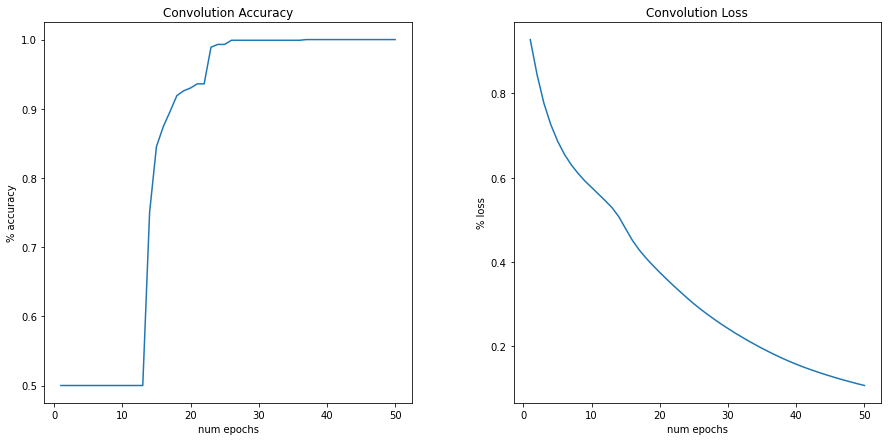

In [43]:
x_int = np.arange(1,51)

gs = gridspec.GridSpec(2,18)
plt.figure(figsize = (15,7))

#accuracy
accuracy = plt.subplot(gs[:,0:8])
plt.ylabel('% accuracy')
plt.xlabel('num epochs')
plt.title('Convolution Accuracy')
accuracy.plot(x_int,history.history['accuracy'])

#loss
loss = plt.subplot(gs[:,10:18])
plt.ylabel('% loss')
plt.xlabel('num epochs')
plt.title('Convolution Loss')
loss.plot(x_int,history.history['loss'])

plt.show()

## 1.5)
If things are working correctly the network should have found a kernel that correctly
distinguishes between horizontal and vertical stripes. You can access the trained kernel using
my kernel=model.get weights()[0]. Make a grey scale plot of the kernel. Comment on the
visual appearance of the kernel. Does it seem reasonable that it is capable of distinguishing
between horizonal and vertical stripes. Explain.

(5, 5, 1, 1)


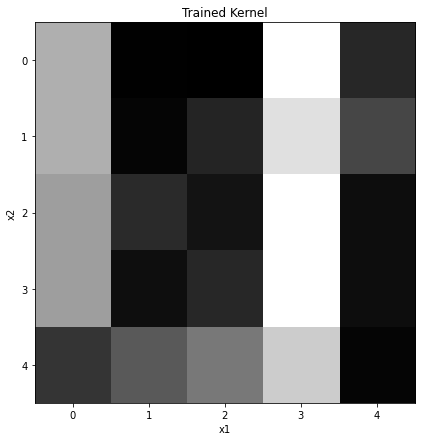

In [45]:
conv_filter = model.get_weights()[0]
print(np.shape(conv_filter))
#print(conv_filter)

my_kernel = conv_filter
my_kernel.shape = (5,5)

plt.figure(figsize = (15,7))
plt.imshow(my_kernel, cmap = 'gray')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trained Kernel')
plt.show()

## 1.6) 
Experiment with your network. What happens if you use a relu activation instead of a
linear activation in the convolution layer ? What happens if you use average pooling instead
of max pooling ? What happens if you use a different kernel size.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 1)         26        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 1)           0         
_________________________________________________________________
dense (Dense)                (None, 1, 1, 2)           4         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
16/16 [==============================] - 1s 66ms/step - loss: 0.7069 - accuracy: 0.5000 - val_loss: 0.6979 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 1s 51ms/step - loss: 0.6897 - accuracy: 0.5000 - val_loss: 0.6829 - val_accuracy: 0.5000
Epoch 3/50
16/16 [==============================] - 1s 50ms/step - loss: 0.6761 - accuracy: 0.5000 - val_los

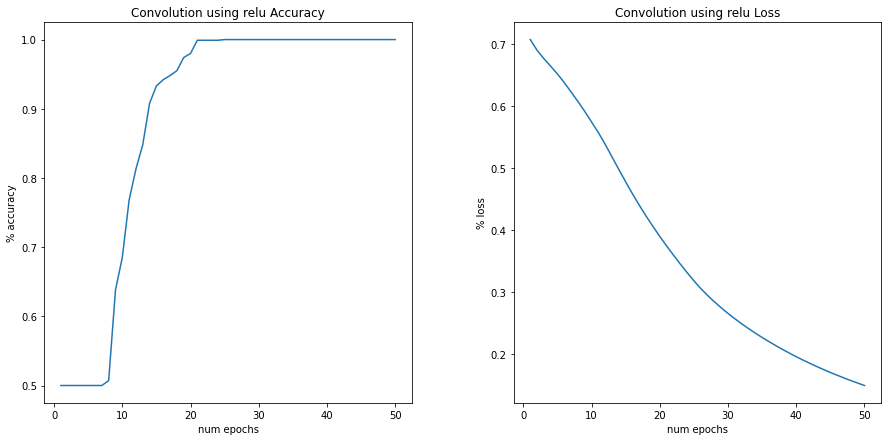

In [7]:
#using relu instead of linear
model = models.Sequential([
    layers.Conv2D(1, 5,padding = 'same', activation='relu', input_shape=(50, 50, 1)),
    layers.MaxPooling2D(pool_size = 50),
    layers.Dense(2,activation='softmax')
    ])

stochastic_GD = tf.keras.optimizers.SGD(learning_rate = 0.15)

model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.summary()

history=model.fit(Xtrain, Ytrain,
                  validation_data=(Xval,Yval),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True) 
x_int = np.arange(1,51)

gs = gridspec.GridSpec(2,18)
plt.figure(figsize = (15,7))

#accuracy
accuracy = plt.subplot(gs[:,0:8])
plt.ylabel('% accuracy')
plt.xlabel('num epochs')
plt.title('Convolution using relu Accuracy')
accuracy.plot(x_int,history.history['accuracy'])

#loss
loss = plt.subplot(gs[:,10:18])
plt.ylabel('% loss')
plt.xlabel('num epochs')
plt.title('Convolution using relu Loss')
loss.plot(x_int,history.history['loss'])

plt.show()



In [ ]:
Relu_Filter = model.get_weights()[0]
#print(conv_filter)

my_kernel = Relu_Filter
my_kernel.shape = (5,5)

plt.figure(figsize = (15,7))
plt.imshow(my_kernel, cmap = 'gray')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trained Kernel for Relu Activation Method')
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(1, 5,padding = 'same', activation='linear', input_shape=(50, 50, 1)),
    layers.AveragePooling2D(pool_size = 50),
    layers.Dense(2,activation='softmax')
    ])

stochastic_GD = tf.keras.optimizers.SGD(learning_rate = 0.15)

model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.summary()

history=model.fit(Xtrain, Ytrain,
                  validation_data=(Xval,Yval),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True) 
x_int = np.arange(1,51)

gs = gridspec.GridSpec(2,18)
plt.figure(figsize = (15,7))

#accuracy
accuracy = plt.subplot(gs[:,0:8])
plt.ylabel('% accuracy')
plt.xlabel('num epochs')
plt.title('Convolution Using AveragePooling Accuracy')
accuracy.plot(x_int,history.history['accuracy'])

#loss
loss = plt.subplot(gs[:,10:18])
plt.ylabel('% loss')
plt.xlabel('num epochs')
plt.title('Convolution Using AveragePooling Loss')
loss.plot(x_int,history.history['loss'])

plt.show()



In [ ]:
avgePool_filter = model.get_weights()[0]
#print(conv_filter)

my_kernel = avgePool_filter
my_kernel.shape = (5,5)

plt.figure(figsize = (15,7))
plt.imshow(my_kernel, cmap = 'gray')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trained Kernel for Average Pooling Method')
plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 50, 50, 1)         101       
_________________________________________________________________
average_pooling2d_2 (Average (None, 1, 1, 1)           0         
_________________________________________________________________
dense_5 (Dense)              (None, 1, 1, 2)           4         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
16/16 [==============================] - 2s 143ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 2s 109ms/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6916 - val_accuracy: 0.4990
Epoch 3/50
16/16 [==============================] - 2s 113ms/step - loss: 0.6910 - accuracy: 0.5030 - 

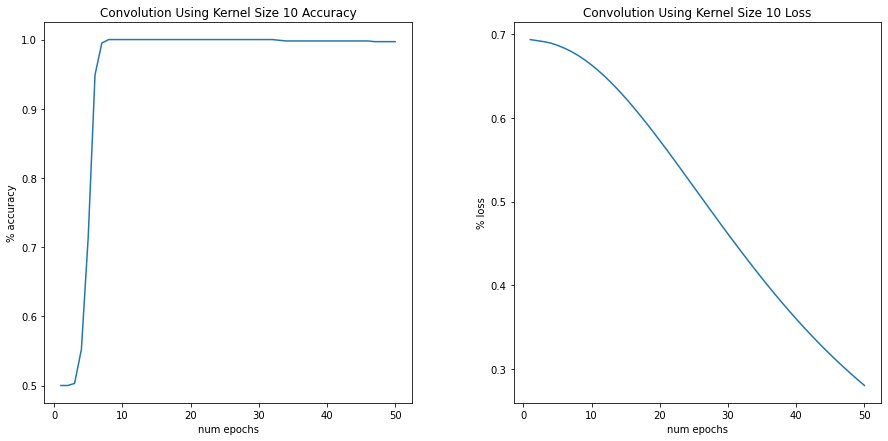

In [68]:
model = models.Sequential([
    layers.Conv2D(1, 10,padding = 'same', activation='linear', input_shape=(50, 50, 1)),
    layers.AveragePooling2D(pool_size = 50),
    layers.Dense(2,activation='softmax')
    ])

stochastic_GD = tf.keras.optimizers.SGD(learning_rate = 0.15)

model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.summary()

history=model.fit(Xtrain, Ytrain,
                  validation_data=(Xval,Yval),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True) 
x_int = np.arange(1,51)

gs = gridspec.GridSpec(2,18)
plt.figure(figsize = (15,7))

#accuracy
accuracy = plt.subplot(gs[:,0:8])
plt.ylabel('% accuracy')
plt.xlabel('num epochs')
plt.title('Convolution Using Kernel Size 10 Accuracy')
accuracy.plot(x_int,history.history['accuracy'])

#loss
loss = plt.subplot(gs[:,10:18])
plt.ylabel('% loss')
plt.xlabel('num epochs')
plt.title('Convolution Using Kernel Size 10 Loss')
loss.plot(x_int,history.history['loss'])

plt.show()


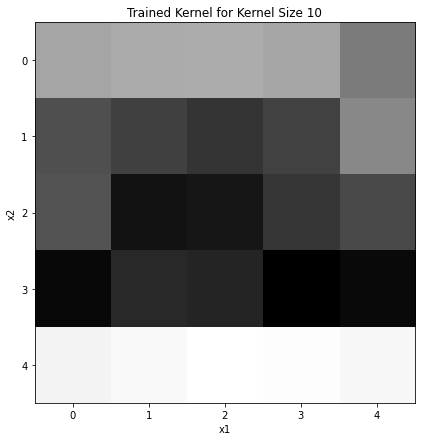

In [8]:
Kernel_10_filter = model.get_weights()[0]
#print(conv_filter)

my_kernel = Kernel_10_filter
my_kernel.shape = (5,5)

plt.figure(figsize = (15,7))
plt.imshow(my_kernel, cmap = 'gray')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trained Kernel for Kernel Size 10')
plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 1)         2         
_________________________________________________________________
average_pooling2d_2 (Average (None, 1, 1, 1)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 1, 1, 2)           4         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
16/16 [==============================] - 0s 27ms/step - loss: 0.6945 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 0s 14ms/step - loss: 0.6941 - accuracy: 0.4980 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 3/50
16/16 [==============================] - 0s 15ms/step - loss: 0.6939 - accuracy: 0.4930 - val_los

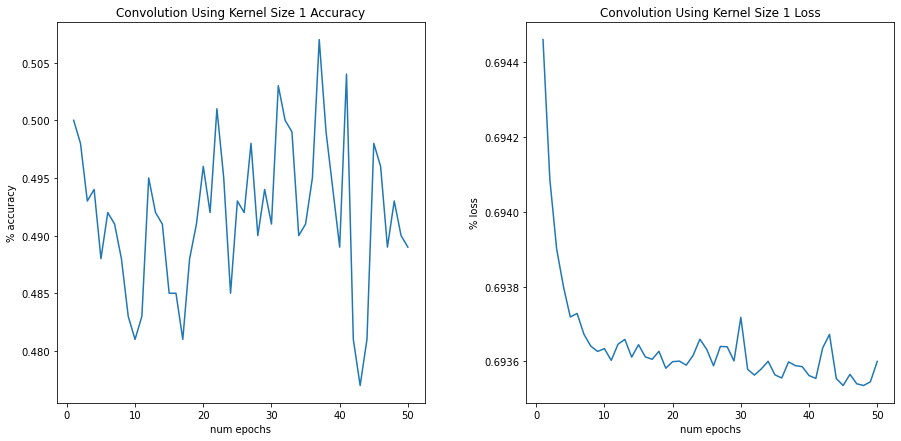

In [11]:
model = models.Sequential([
    layers.Conv2D(1, 1,padding = 'same', activation='linear', input_shape=(50, 50, 1)),
    layers.AveragePooling2D(pool_size = 50),
    layers.Dense(2,activation='softmax')
    ])

stochastic_GD = tf.keras.optimizers.SGD(learning_rate = 0.15)

model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.summary()

history=model.fit(Xtrain, Ytrain,
                  validation_data=(Xval,Yval),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True) 
x_int = np.arange(1,51)

gs = gridspec.GridSpec(2,18)
plt.figure(figsize = (15,7))

#accuracy
accuracy = plt.subplot(gs[:,0:8])
plt.ylabel('% accuracy')
plt.xlabel('num epochs')
plt.title('Convolution Using Kernel Size 1 Accuracy')
accuracy.plot(x_int,history.history['accuracy'])

#loss
loss = plt.subplot(gs[:,10:18])
plt.ylabel('% loss')
plt.xlabel('num epochs')
plt.title('Convolution Using Kernel Size 1 Loss')
loss.plot(x_int,history.history['loss'])

plt.show()

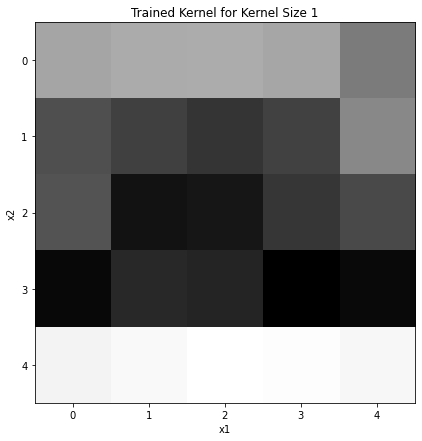

In [12]:
Kernel_1_filter = model.get_weights()[0]
#print(conv_filter)

my_kernel = Kernel_10_filter
my_kernel.shape = (5,5)

plt.figure(figsize = (15,7))
plt.imshow(my_kernel, cmap = 'gray')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trained Kernel for Kernel Size 1')
plt.show()

# Exercise 2

In this exercise we work through Example 10.3 in the book based on the dataset
’multiple sine waves.csv’. We want to fit the data to a set of B = 2 parameterized sinusoidal feature transformations:

f1(⃗x) = sin(w1,0 + w1,1x1 + w1,2x2)

f2(⃗x) = sin(w2,0 + w2,1x1 + w2,2x2)

We will implement this exercise fully in python. As explained in section 10.2.3 it is useful to
define the following functions:


In [13]:
csvname = datapath + 'multiple_sine_waves.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:2,:]
y = data[2:,:]

In [14]:
import autograd.numpy as np

def feature_transforms(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return np.sin(a).T

def model(x,w):    
    # feature transformation 
    f = feature_transforms(x,w[0])
    
    # compute linear combination and return
    a = w[1][0] + np.dot(f.T,w[1][1:])
    return a.T

In [15]:
from autograd import grad 

def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)
    
    if alpha == 'diminishing': #check for decreasing alpha
        alpha = 1/float(k)
    else:
        ()
    
    weight_history = [w]    
    cost_history = [g(w)]    
    for k in range(max_its):
        grad_eval = gradient(w)

        weight_history.append(w)
        cost_history.append(g(w))
        
        w = w - alpha*grad_eval 
        
    return weight_history,cost_history

def least_squares(w):
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))

Use gradient descent with max its = 2000; alpha choice = 10**(0); and a least squares
cost to determine the most optimal parameters with minimum cost. List the optimal parameters. Make a plot of the cost function versus iteration. (It’s not required, but if you like you
can then try to reproduce the plots in Figure 10.7, which are plots of what exactly ?)

The optimal parameters occur at:	 2000 

The optimal parameters are:
 [[[-6.28316617e+00  6.28311930e+00]
  [ 5.75493443e+00 -3.65464516e+00]
  [ 5.25095592e+00 -8.17291962e+00]]

 [[ 1.82056417e-05  2.21645403e-05]
  [-2.95003431e-04 -9.99922600e-01]
  [-1.00016738e+00  1.57664497e-04]]] 



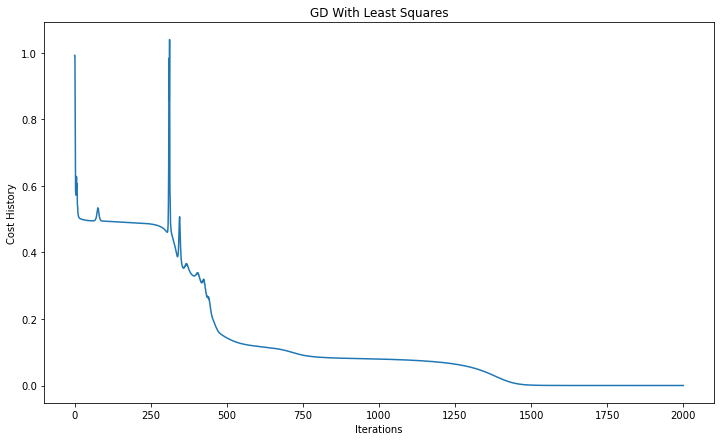


Figure 10.7:


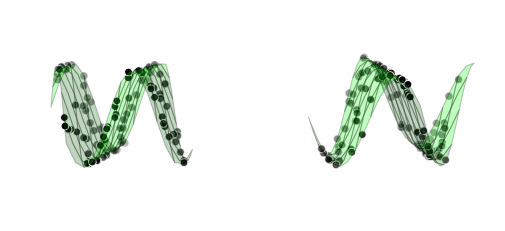

In [21]:
max_its = 2000
alpha = 10**0
g = least_squares
w = np.array([np.random.randn(3,2),np.random.randn(3,2)])

weight_history,cost_history = gradient_descent(g,alpha,max_its,w)

opt_index = np.argmin(cost_history)
optimal_parameters = weight_history[opt_index]

print('The optimal parameters occur at:\t',opt_index,'\n')
print('The optimal parameters are:\n',optimal_parameters,'\n')


num_its = np.arange(0,2001)
plt.figure(figsize = (12,7))
plt.plot(num_its,cost_history)
plt.title('GD With Least Squares')
plt.xlabel('Iterations')
plt.ylabel('Cost History')
plt.show()


#note in order to recreate figure 10.7 need to use the mlrefined libraries from GitHub
from mlrefined_libraries import math_optimization_library as optlib
optimizers = optlib.optimizers
static_plotter = optlib.static_plotter.Visualizer()
plotter = superlearn.multi_outupt_plotters

predictor = lambda x: model(x,optimal_parameters)

# plot data with predictions
print('\nFigure 10.7:')
plotter.plot_regressions(x,y,predictor,view1 = [6,-10],view2 = [11,-62])

# Exercise 3

Let’s return to the MNIST data set of hand-written data that we have worked with previously. We want to experiment with how we best tune a model to get the most optimal version. To that end let us consider the following classifier built in Tensorflow/Keras

## 3.1)
From the history plot ’val loss’ versus the epochs for different training rates, α =
1., 0.5, 0.1, 0.01 and 0.001. The loss is in this case defined from the categorical crossentropy
while the accuracy is the percentage of correct predictions. If you’re running this in a jupyter
notebooks you may need to clear the output or run the different values of α in separate notebooks. What happens as you decrease the value of α ? What can you say about the first value
of α = 1.0 ? Explain your results.

In [27]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

alpha = [1., 0.5, 0.1, 0.01, 0.001]
loss = []

for i in range(len(alpha)):
    
    model = keras.Sequential([
      layers.Dense(512, activation='relu'),
      layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.RMSprop(alpha[i]),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history=model.fit(train_images, train_labels,
              epochs=10,
              batch_size=128,
              validation_split=0.2)
    print('DONE')
    loss.append(history.history['loss'])
    
    


Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 868.1467 - accuracy: 0.3459 - val_loss: 2.4033 - val_accuracy: 0.1958
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 4.1208 - accuracy: 0.2636 - val_loss: 7.4572 - val_accuracy: 0.3211
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 3.6794 - accuracy: 0.2603 - val_loss: 2.3600 - val_accuracy: 0.2763
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 3.8718 - accuracy: 0.2529 - val_loss: 2.0399 - val_accuracy: 0.2777
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 2.9898 - accuracy: 0.2560 - val_loss: 2.4979 - val_accuracy: 0.2537
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 2.5806 - accuracy: 0.2603 - val_loss: 2.0458 - val_accuracy: 0.2299
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 2.7668 - accuracy: 0.2537 - val_loss: 2.6923 - val_accuracy: 0.2479
Epoc

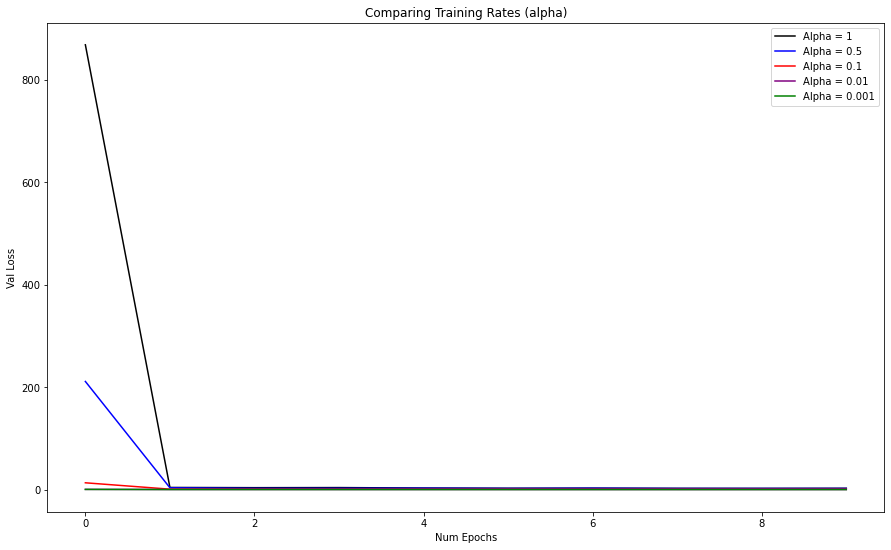

In [35]:
x_int = np.arange(0,10)

plt.figure(figsize = (15,9))
plt.plot(x_int,loss[0], color = 'black')
plt.plot(x_int,loss[1], color = 'blue')
plt.plot(x_int,loss[2], color = 'red')
plt.plot(x_int,loss[3], color = 'purple')
plt.plot(x_int,loss[4], color = 'green')

plt.title('Comparing Training Rates (alpha)')
plt.legend(['Alpha = 1','Alpha = 0.5','Alpha = 0.1','Alpha = 0.01','Alpha = 0.001'])
plt.xlabel('Num Epochs')
plt.ylabel('Val Loss')
plt.show()



## 3.2)
Now let us look at a very small model just doing logistic regression on the MNIST data:


Note that, if we don’t specify any learning rate then the ’rmsprop’ optimizer defaults to a
learning rate of 0.001. You should again plot the ’val loss’ versus the epochs. Is there a
clear minimum in the validation loss indicating where we start to overfit ?


In [29]:
model = keras.Sequential([layers.Dense(10, activation='softmax')])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 0.6634 - accuracy: 0.8372 - val_loss: 0.3582 - val_accuracy: 0.9049
Epoch 2/50
375/375 [==============================] - 1s 1ms/step - loss: 0.3509 - accuracy: 0.9035 - val_loss: 0.3076 - val_accuracy: 0.9164
Epoch 3/50
375/375 [==============================] - 1s 1ms/step - loss: 0.3157 - accuracy: 0.9116 - val_loss: 0.2897 - val_accuracy: 0.9185
Epoch 4/50
375/375 [==============================] - 1s 1ms/step - loss: 0.2992 - accuracy: 0.9161 - val_loss: 0.2823 - val_accuracy: 0.9206
Epoch 5/50
375/375 [==============================] - 1s 1ms/step - loss: 0.2894 - accuracy: 0.9190 - val_loss: 0.2755 - val_accuracy: 0.9252
Epoch 6/50
375/375 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.9211 - val_loss: 0.2736 - val_accuracy: 0.9236
Epoch 7/50
375/375 [==============================] - 1s 1ms/step - loss: 0.2779 - accuracy: 0.9220 - val_loss: 0.2697 - val_accuracy: 0.9258
Epoch 

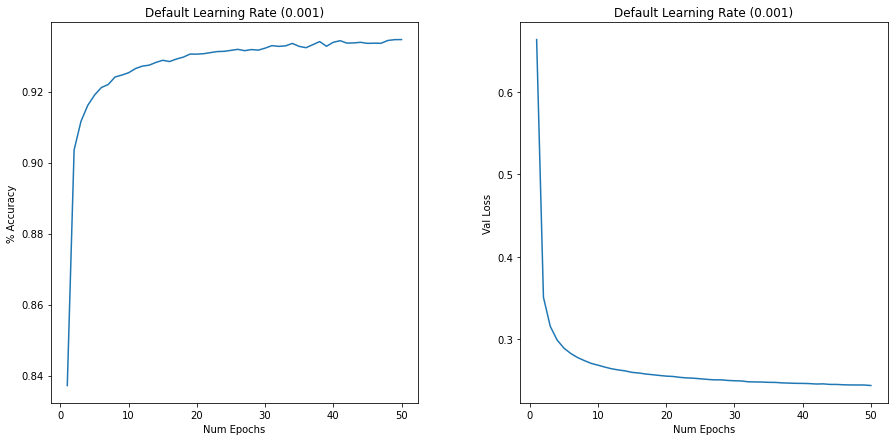

In [39]:
x_int = np.arange(1,51)

gs = gridspec.GridSpec(2,18)
plt.figure(figsize = (15,7))

#accuracy
accuracy = plt.subplot(gs[:,0:8])
plt.title('Default Learning Rate (0.001)')
plt.xlabel('Num Epochs')
plt.ylabel('% Accuracy')
accuracy.plot(x_int,history_small_model.history['accuracy'])

#loss
loss = plt.subplot(gs[:,10:18])
plt.title('Default Learning Rate (0.001)')
plt.xlabel('Num Epochs')
plt.ylabel('Val Loss')
loss.plot(x_int,history_small_model.history['loss'])


## 3.3)
Now let us increase the complexity of the model by putting in hidden layers:

Repeat the plot of the ’val loss’ versus the epochs. Is there in this case a clear minimum
with a well defined region of overfitting ? Comment on your observations.


In [40]:
model = keras.Sequential([
  layers.Dense(96, activation='relu'),
  layers.Dense(96, activation='relu'),
  layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3593 - accuracy: 0.8977 - val_loss: 0.1843 - val_accuracy: 0.9449
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1606 - accuracy: 0.9520 - val_loss: 0.1356 - val_accuracy: 0.9590
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1127 - accuracy: 0.9664 - val_loss: 0.1148 - val_accuracy: 0.9654
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0842 - accuracy: 0.9746 - val_loss: 0.1047 - val_accuracy: 0.9684
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9790 - val_loss: 0.1043 - val_accuracy: 0.9678
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 0.1032 - val_accuracy: 0.9707
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0473 - accuracy: 0.9853 - val_loss: 0.0999 - val_accuracy: 0.9715
Epoch 

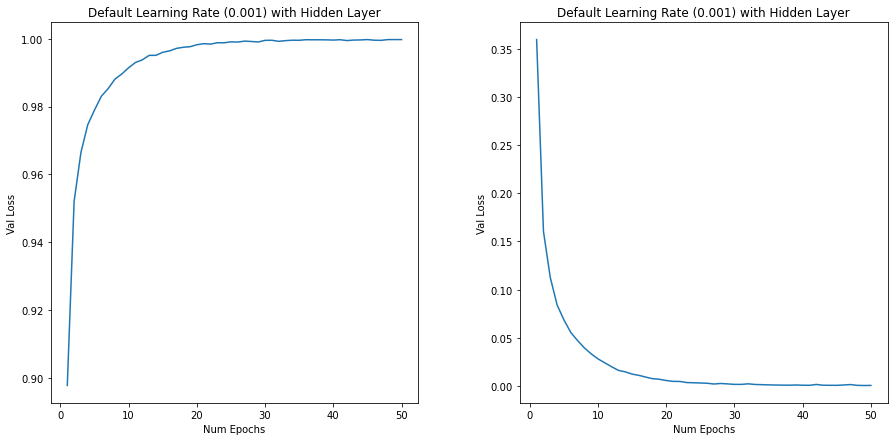

In [41]:
x_int = np.arange(1,51)

gs = gridspec.GridSpec(2,18)
plt.figure(figsize = (15,7))

#accuracy
accuracy = plt.subplot(gs[:,0:8])
plt.title('Default Learning Rate (0.001) with Hidden Layer')
plt.xlabel('Num Epochs')
plt.ylabel('Val Loss')
accuracy.plot(x_int,history_large_model.history['accuracy'])

#loss
loss = plt.subplot(gs[:,10:18])
plt.title('Default Learning Rate (0.001) with Hidden Layer')
plt.xlabel('Num Epochs')
plt.ylabel('Val Loss')
loss.plot(x_int,history_large_model.history['loss'])


# Exercise 4

Scikit-learn has a powerful tree regressor built in. In this exercise we will verify that it is actually working correctly by explicitly implementing it in python and plotting the results together
with the output from Scikit-learn. That sounds like a lot of work but we will simplify things
by first of all focusing on a one-dimensional model and secondly assuming that we only need to
know the result of the regression in the points xp. The model predicted by Scikit-learn can be
evaluated at any x but that becomes a little to much book keeping for our purposes. Following
the Scikit-learn manual we generate noisy data for sin(x) and perform a tree regression to a
max depth=2 and max depth=5 as follows:


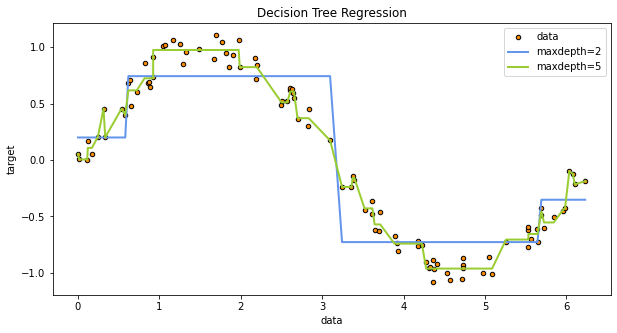

In [10]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(6.3 * rng.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y += 0.3 * (0.5 - rng.rand(len(X)))
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results of the sklearn built in function
plt.figure(figsize = (10,5))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X, y_1, color="cornflowerblue",
         label="maxdepth=2", linewidth=2)
plt.plot(X, y_2, color="yellowgreen", label="maxdepth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In this example we are asking Scikit-learn for 2 tree regressions to a maximum depth of 2 and
5, respectively.

Suppose, we have noisy data {xp, yp} with xp sorted along the x-axis. Then, as discussed in
class and in chapter 14, the splitting points for the tree stumps will be between two values of xs
and xs+1. The value for the leaves on either side is simply the average of the yp’s on either side.
In order to determine the optimal split we can use a least squared cost. We can then write a
function that recursively calls it self on smaller and smaller intervals. To simply things we can
assume all the xp and yp are distinct. Implement a simple version of a tree regressor that can
perform a tree regression to a specified maximum depth. Make sure that you correctly handle
the case where an interval contains just a single point. Plot your results along with the results
from sklearn as well as the original data. Do they agree ?

My implementation starts as follows:


In [16]:
def My_TreeRegressor(y,il,ir,max_depth,level=0):
    global yreg
    
    #if we are at the starting level need to define the staring values 
    if (level==0): yreg=np.zeros(len(y))
    
    #starting values for the cost and spliting index
    min_cost = 1000
    split_index = 50
    #starting values for the hieght of the left and right interval of the function
    h_left_func = -1
    h_right_func = 1
    
    #determines the ideal spliting index of the data
    for i in range(ir-il):
        #Compute the new height of the left and right intervals 
        h_left = np.sum(y[il:il+i+1])/len(y[il:il+i+1])
        h_right = np.sum(y[il+i+1:ir])/len(y[il+i+1:ir])
        
        #Compute least squared cost for both the left and right side of the interval
        cost_left = np.sum((h_left - y[il:il+i+1])**2)
        cost_right = np.sum((h_right - y[il+i+1:ir])**2)
        
        cost = (cost_left + cost_right) / len(y[il:ir])
        
        #if the new cost is lower than previous update the heights and spliting index
        if(cost < min_cost):
            split_index = il + 1
            h_left_func = h_left
            h_right_func = h_right
            min_cost = cost
        
    #creating the regression left side
    yreg[il:split_index+1] = [h_left_func for h in range(len(yreg[il:split_index+1]))]
    #creating the regression right side
    yreg[split_index+1:ir+1] = [h_right_func for h in range(len(yreg[split_index+1:ir+1]))]
    
    #next level
    level = level + 1 
    
    #if we have reached the final level return the data and end the function
    if(level > max_depth):
        return
    
    #if hit left side of interval coninue dividing rhs
    elif(split_index == il):
        My_TreeRegressor(y,split_index+1,ir,max_depth,level)
        
    #if hit right side of interval coninue dividing lhs
    elif(split_index == ir):
        My_TreeRegressor(y,il,split_index,max_depth,level)
        
    else:
        My_TreeRegressor(y,split_index+1,ir,max_depth,level)
        My_TreeRegressor(y,il,split_index,max_depth,level)
    
    #will automatically get to final level and thus do not need a return in else statement
    return    

Here, (somewhat clumsily) I keep track of the final tree regression in the global array yreg.
Perhaps one of you can find a more elegant way of returning the final tree regression fit. Since
we’re only asking for the regression results in the discrete points xp, yreg is simply an array in
my implementation.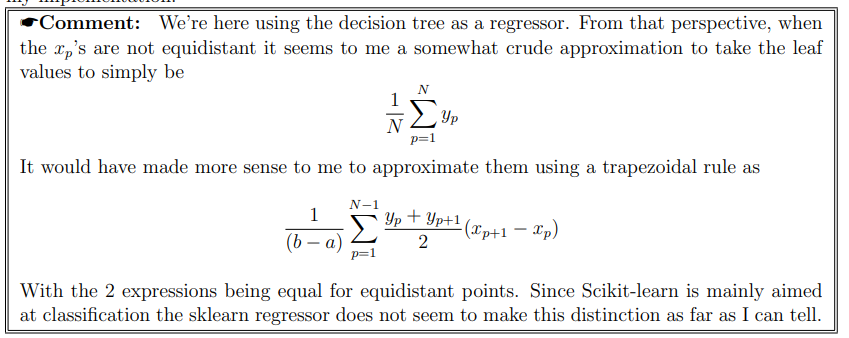
![image.png](attachment:8b5ffa5a-b2ce-49e7-b4f5-46d8bea98e97.png)

In [17]:
print(len(X))
il = 0
ir = len(X)
max_depth = 2
My_TreeRegressor(y,il,ir,max_depth,level=0)
reg_2 = yreg

il = 0
ir = len(X)
max_depth = 5
My_TreeRegressor(y,il,ir,max_depth,level=0)
reg_5 = yreg

100


C:\Users\callu\anaconda3\envs\tensorFlow\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


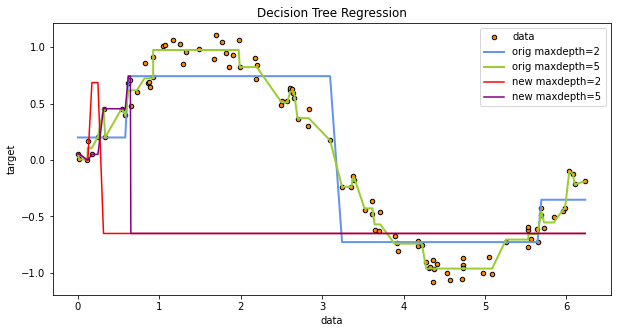

In [23]:
#Use this for side by side view
'''
gs = gridspec.GridSpec(2,18)
plt.figure(figsize = (25,7))


built_func = plt.subplot(gs[:,0:8])
built_func.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
built_func.plot(X, y_1, color="cornflowerblue",
         label="maxdepth=2", linewidth=2)
built_func.plot(X, y_2, color="yellowgreen", label="maxdepth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression Using Sklearn")
plt.legend()

created_tree = plt.subplot(gs[:,10:18])
created_tree.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
created_tree.plot(X,reg_2, color = 'cornflowerblue', label = 'maxdepth=2')
created_tree.plot(X,reg_5, color = 'yellowgreen', label = 'maxdepth=5')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression Using Built Funciton")
plt.legend()

plt.show()
'''

#Use this for single graph comparison

plt.figure(figsize = (10,5))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X, y_1, color="cornflowerblue",
         label="orig maxdepth=2", linewidth=2)
plt.plot(X, y_2, color="yellowgreen", label="orig maxdepth=5", linewidth=2)
plt.plot(X,reg_2, color = 'red', label = 'new maxdepth=2')
plt.plot(X,reg_5, color = 'purple', label = 'new maxdepth=5')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

C:\Users\callu\anaconda3\envs\tensorFlow\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\callu\anaconda3\envs\tensorFlow\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\callu\anaconda3\envs\tensorFlow\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\callu\anaconda3\envs\tensorFlow\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\callu\anaconda3\envs\tensorFlow\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\callu\anaconda3\envs\tensorFlow\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


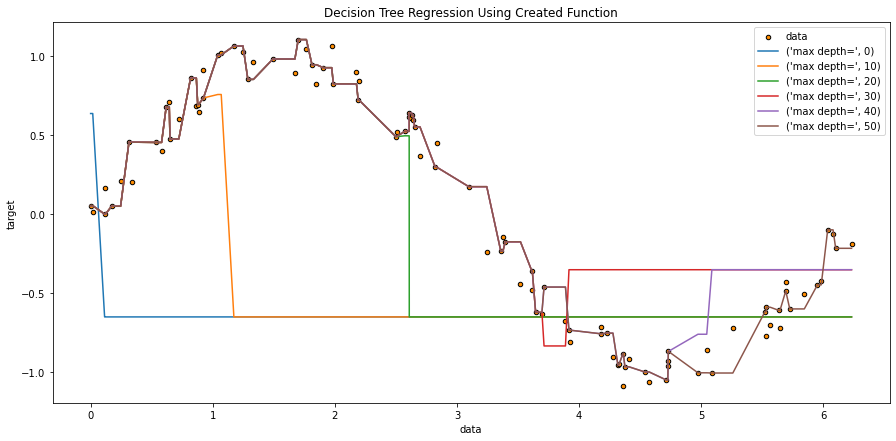

In [22]:
y_data = []
il = 0
ir = len(X)
plt.figure(figsize = (15,7))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression Using Created Function")

for i in range(6):
    max_depth = i*10
    My_TreeRegressor(y,il,ir,max_depth,level=0)
    y_data.append(yreg)
    plt.plot(X,y_data[i], label = ('max depth=',max_depth))

plt.legend()
plt.show()

